In [1]:
!pip install WordCloud

In [2]:
# loading pkgs

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [3]:
# loading dataset
# data source : https://www.kaggle.com/kazanova/sentiment140
columns_name = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding = 'latin-1' , names = columns_name)
df = shuffle(df)
df = df[0:50000]
display(df.head())
display(df.info())

,target,ids,date,flag,user,text
1030909,4,1932993319,Tue May 26 22:43:13 PDT 2009,NO_QUERY,prettysilly,"@dyaniss Teach me tomorrow, please?"
138676,0,1880614697,Fri May 22 01:52:28 PDT 2009,NO_QUERY,tsarnick,.@Boy_Kill_Boy hey dude!! @MissxMarisa was sta...
1415120,4,2057170075,Sat Jun 06 12:30:13 PDT 2009,NO_QUERY,Adrienne_Bailon,@diva294 Thank you mama!!!
1393506,4,2053518915,Sat Jun 06 04:50:32 PDT 2009,NO_QUERY,mariakitano,"@TeresatheGG im good , just finished a postcard"
1544910,4,2181899891,Mon Jun 15 12:27:02 PDT 2009,NO_QUERY,Swampfeet,@UndigestedHusks Hey I bet you can find me a t...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1030909 to 133332
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  int64 
 1   ids     50000 non-null  int64 
 2   date    50000 non-null  object
 3   flag    50000 non-null  object
 4   user    50000 non-null  object
 5   text    50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


None

## Exploratory Data Analysis

In [4]:
df.isnull().any()

target    False
ids       False
date      False
flag      False
user      False
text      False
dtype: bool

In [5]:
print(df.target.unique())

[4 0]


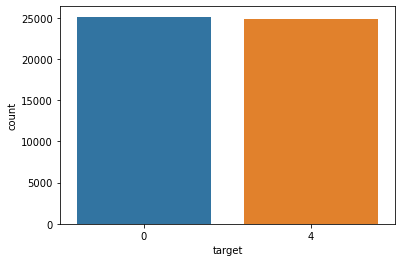

In [6]:
# show the distribution of labels
sns.countplot(df.target)
plt.show()

In [7]:
df = df.drop(['ids','date','flag','user'], axis=1)

In [8]:
user_tweets=list(df['text'])
df['target']=df['target'].map({0:0,4:1})
df['target'].value_counts()

0    25139
1    24861
Name: target, dtype: int64

In [9]:
labels=df['target'].values

## Cleaning data and removing stop words

In [10]:
clean_tweets =[i.lower() for i in user_tweets] 
clean_tweets=[re.sub('RT @\w+:'," ", i) for i in clean_tweets]
clean_tweets=[re.sub('@(\w+)'," ", i) for i in clean_tweets]
clean_tweets =[re.sub('\d'," ", i) for i in clean_tweets] 
clean_tweets =[re.sub('http\S+'," ", i) for i in clean_tweets] 
clean_tweets =[i.translate(str.maketrans('', '', string.punctuation)) for i in clean_tweets] 
clean_tweets =[re.sub('\s+'," ", i) for i in clean_tweets] 

stpwords = stopwords.words("english")
# Removing stopwords
clean_tweets = [word for word in clean_tweets if word not in stpwords]


<function matplotlib.pyplot.show(*args, **kw)>

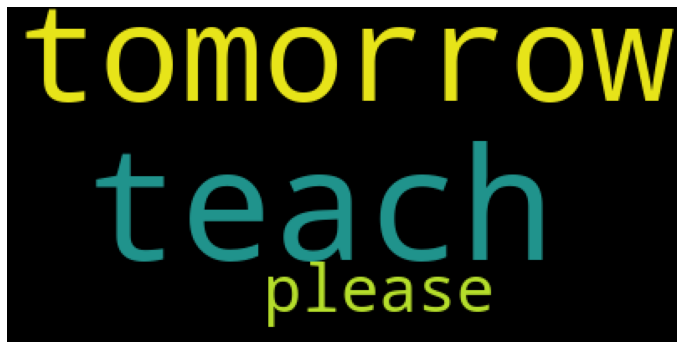

In [11]:
#Generating the wordCloud for the first row of the tweets.
text = clean_tweets[0]
wordcloud = WordCloud().generate(text)

#plot the wordccloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off") # to remove axis
plt.show

## Feature Selection using TfidfVectorizer as vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
class_vector = vectorizer.fit_transform(clean_tweets)

### Model Selection and Training

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(class_vector,labels,test_size=0.3)

#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [15]:
#Printing the confusion matrix of the predicted values

from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      7395
           1       0.78      0.76      0.77      7605

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



In [16]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Recall metric in the train dataset: 76.01577909270218%


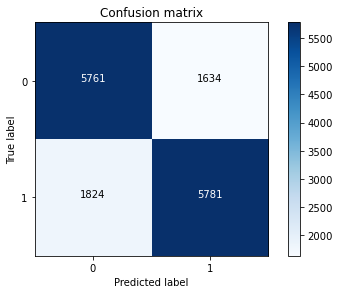

In [17]:
y_pred=lr.predict(X_test)

cnf_matrix_tra = confusion_matrix(y_pred,y_test)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

### RandomForest Classifier

In [18]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth=4, random_state=0, oob_score=True, n_jobs =-1, verbose=5, class_weight="balanced")
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000building tree 2 of 1000building tree 3 of 1000building tree 4 of 1000



building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000building tree 10 of 1000
building tree 11 of 1000

building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 20 of 1000building tree 21 of 1000

building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000building tree 53 of 1000

building tree 54 of 1000building tree 55 of 1000

building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s



building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000building tree 108 of 1000

building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000building tree 112 of 1000

building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000building tree 117 of 1000
building tree 118 of 1000

building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 13

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s


building tree 172 of 1000

building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000building tree 193 of 1000
building tree 194 of 1000

building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.7s



building tree 290 of 1000building tree 291 of 1000building tree 292 of 1000


building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000building tree 317 of 1000

building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.6s



building tree 455 of 1000
building tree 456 of 1000
building tree 457 of 1000building tree 458 of 1000

building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000
building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000
building tree 465 of 1000
building tree 466 of 1000
building tree 467 of 1000
building tree 468 of 1000
building tree 469 of 1000
building tree 470 of 1000
building tree 471 of 1000building tree 472 of 1000

building tree 473 of 1000
building tree 474 of 1000
building tree 475 of 1000
building tree 476 of 1000
building tree 477 of 1000
building tree 478 of 1000
building tree 479 of 1000building tree 480 of 1000

building tree 481 of 1000
building tree 482 of 1000
building tree 483 of 1000
building tree 484 of 1000
building tree 485 of 1000
building tree 486 of 1000
building tree 487 of 1000
building tree 488 of 1000
building tree 489 of 1000
building tree 490 of 1000
building tree 491 of 1000
building tree 492 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    3.8s



building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000building tree 702 of 1000

building tree 703 of 1000
building tree 704 of 1000
building tree 705 of 1000
building tree 706 of 1000
building tree 707 of 1000
building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tree 713 of 1000building tree 714 of 1000

building tree 715 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:    5.0s



building tree 892 of 1000
building tree 893 of 1000
building tree 894 of 1000
building tree 895 of 1000
building tree 896 of 1000
building tree 897 of 1000
building tree 898 of 1000
building tree 899 of 1000
building tree 900 of 1000
building tree 901 of 1000
building tree 902 of 1000
building tree 903 of 1000
building tree 904 of 1000
building tree 905 of 1000
building tree 906 of 1000
building tree 907 of 1000building tree 908 of 1000

building tree 909 of 1000
building tree 910 of 1000
building tree 911 of 1000
building tree 912 of 1000
building tree 913 of 1000
building tree 914 of 1000
building tree 915 of 1000
building tree 916 of 1000
building tree 917 of 1000
building tree 918 of 1000
building tree 919 of 1000
building tree 920 of 1000
building tree 921 of 1000
building tree 922 of 1000
building tree 923 of 1000
building tree 924 of 1000
building tree 925 of 1000
building tree 926 of 1000
building tree 927 of 1000
building tree 928 of 1000
building tree 929 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.6s finished


RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=5)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


-------------------------------------------------------------------------------
Recall metric in the train dataset: 69.417593040116%
-------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      6724
           1       0.77      0.69      0.73      8276

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.73      0.72      0.72     15000



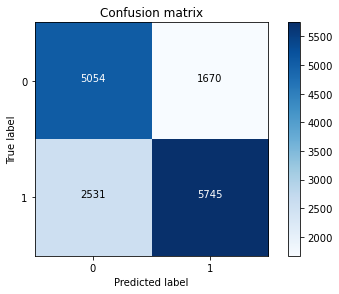

In [19]:
y_train_pre = clf.predict(X_test)

cnf_matrix_tra = confusion_matrix(y_train_pre,y_test)
print("-------------------------------------------------------------------------------")
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
print("-------------------------------------------------------------------------------")
print(classification_report(y_train_pre,y_test))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()